## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
#Doing this in local machine as the dataset is pretty small

#### Change your present working directory

In [2]:
#Uploaded the file so reading it directly

### Load your data file

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv', index_col='Date')

In [5]:
df.shape

(3650, 1)

In [6]:
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [7]:
df.dtypes

Temperature    float64
dtype: object

#### Plot data

In [8]:
df.plot()

#### Descibe your dataframe

In [9]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


#### Check for null values

In [10]:
df.isnull().sum()

Temperature    0
dtype: int64

#### Drop null values

In [11]:
#No null values
#df.dropna(inplace=True)

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000077A5FE5DD8>]],
      dtype=object)

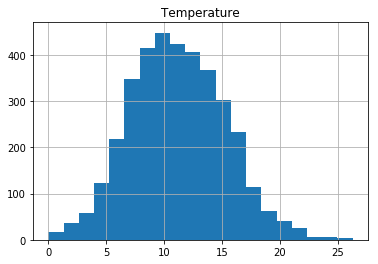

In [12]:
df.hist(bins=20)

#### Check the maximum and minimum values

In [13]:
print('maximum value', np.max(df['Temperature']))
print('minimum value', np.min(df['Temperature']))

maximum value 26.3
minimum value 0.0


### Normalize the data

In [14]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

scaleddf = sc.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [15]:
print('maximum value', np.max(scaleddf))
print('minimum value', np.min(scaleddf))

maximum value 1.0
minimum value 0.0


#### Look into some of the scaled values

In [16]:
scaleddf

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.51330798],
       [0.59695817],
       [0.49429658]])

### Split data into Training and Testing

In [17]:
train = df.iloc[:3000,:]
test = df.iloc[3000: ,:]

#### Print train and test size

In [18]:
print(train.shape)
print(test.shape)

(3000, 1)
(650, 1)


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [19]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back), 0]
        dataset.iloc[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [20]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2998, 1, 1)
(648, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
batch_size = 1
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.
W1222 12:27:42.960890  7716 deprecation_wrapper.py:119] From E:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1222 12:27:42.980891  7716 deprecation_wrapper.py:119] From E:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1222 12:27:42.983894  7716 deprecation_wrapper.py:119] From E:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1222 12:27:43.219058  7716 deprecation_wrapper.py:119] From E:\Anaconda\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Summarize your model

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [24]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2, shuffle=True)

W1222 12:27:43.641577  7716 deprecation.py:323] From E:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1222 12:27:44.007853  7716 deprecation_wrapper.py:119] From E:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1222 12:27:44.110926  7716 deprecation_wrapper.py:119] From E:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
 - 6s - loss: 65.1600
Epoch 2/100
 - 5s - loss: 14.7461
Epoch 3/100
 - 5s - loss: 9.0642
Epoch 4/100
 - 5s - loss: 7.9696
Epoch 5/100
 - 5s - loss: 7.5685
Epoch 6/100
 - 5s - loss: 7.3566
Epoch 7/100
 - 5s - loss: 7.1792
Epoch 8/100
 - 5s - loss: 7.1832
Epoch 9/100
 - 5s - loss: 7.0933
Epoch 10/100
 - 5s - loss: 6.9401
Epoch 11/100
 - 5s - loss: 6.9257
Epoch 12/100
 - 5s - loss: 6.9521
Epoch 13/100
 - 5s - loss: 6.8749
Epoch 14/100
 - 5s - loss: 6.8957
Epoch 15/100
 - 5s - loss: 6.8868
Epoch 16/100
 - 5s - loss: 6.9000
Epoch 17/100
 - 5s - loss: 6.8836
Epoch 18/100
 - 5s - loss: 6.8976
Epoch 19/100
 - 5s - loss: 6.8681
Epoch 20/100
 - 5s - loss: 6.9519
Epoch 21/100
 - 5s - loss: 6.9028
Epoch 22/100
 - 6s - loss: 6.9106
Epoch 23/100
 - 6s - loss: 7.0059
Epoch 24/100
 - 5s - loss: 7.0475
Epoch 25/100
 - 5s - loss: 7.1456
Epoch 26/100
 - 5s - loss: 7.4253
Epoch 27/100
 - 7s - loss: 7.8092
Epoch 28/100
 - 5s - loss: 8.0384
Epoch 29/100
 - 5s - loss: 7.6596
Epoch 30/100
 - 8s - 

## Make Predictions and Evaluate your model

In [25]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)

model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)

# invert predictions
trainPredict = sc.inverse_transform(trainPredict)
y_train = sc.inverse_transform([y_train])
testPredict = sc.inverse_transform(testPredict)
y_test = sc.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 71.82 RMSE
Test Score: 71.24 RMSE


## Plot the results

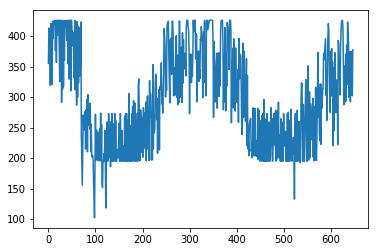

In [26]:
import matplotlib.pyplot as plt
plt.plot(testPredict)
plt.show()